In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1655,7963-GQRMY,Female,0,Yes,Yes,3,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.3,134.5,Yes
1463,4763-PGDPO,Female,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.4,281,Yes
3040,7317-GGVPB,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.6,7690.9,Yes
2103,7206-PQBBZ,Male,1,Yes,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.2,834.7,No
1575,2003-CKLOR,Male,0,No,No,66,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.5,6710.5,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Handle nan 

In [4]:
checknull = np.array(pd.to_numeric(df['TotalCharges'],errors='coerce').isnull())
np.where(checknull==True)

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.dropna(how = 'any',inplace=True)
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

Visualization of the imbalanced dataset

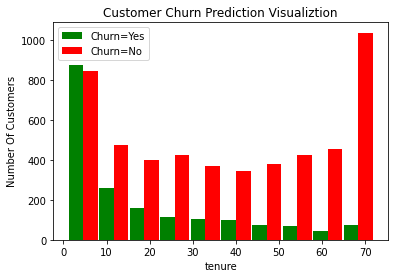

In [8]:
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

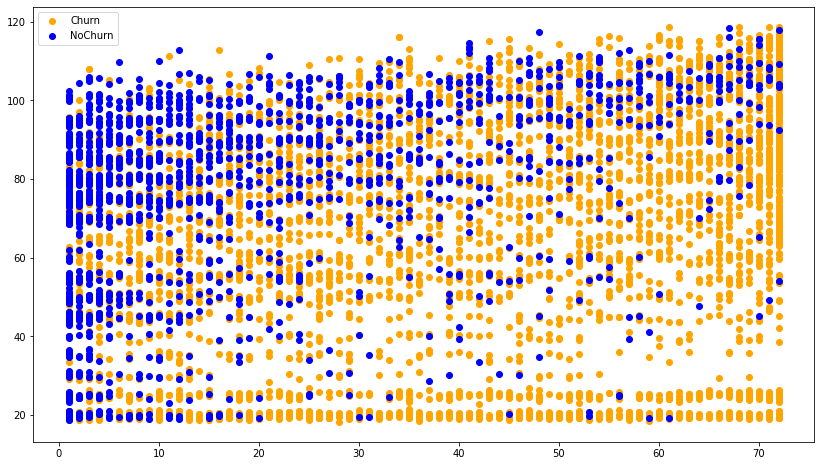

In [9]:
import pandas as pd
import seaborn as sns
plt.figure(figsize = (14,8))
# sns.scatterplot(data = df,x='tenure',y='MonthlyCharges',hue = 'Churn')
g1 = plt.scatter(df[df['Churn']=='No'].tenure,df[df['Churn']=='No'].MonthlyCharges,color = 'orange')
g2 = plt.scatter(df[df['Churn']=='Yes'].tenure,df[df['Churn']=='Yes'].MonthlyCharges,color = 'blue')
plt.legend((g1,g2),
           ('Churn', 'NoChurn'))
plt.show()

In [10]:
df.drop(columns = 'customerID',inplace=True)

In [11]:
# convert everything to numeric value
for x in df.columns:
    print("{}: {}".format(x,df[x].unique()))

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [12]:
df.replace('No internet service','No',inplace = True)
df.replace('No phone service','No',inplace = True)
df.replace({'Yes':1 , 'No':0},inplace=True)
df.replace({'Female' : 1, 'Male' : 0},inplace=True)

In [13]:
new_df = pd.get_dummies(df,columns = ['InternetService','Contract','PaymentMethod'])
new_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [14]:
scaler_columns = []
for column in new_df.columns:
    if np.mean(new_df[column]) > 1:
        scaler_columns.append(column)

In [15]:
# feature scaling
MMS = MinMaxScaler()
for column in scaler_columns:
    new_df[column] = MMS.fit_transform(new_df[[column]])

In [16]:
# all numeric values
for column in new_df.columns:
    print("{}: {}".format(column,new_df[column].unique()))

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Undersampling

In [17]:
count_class1, count_class2 = new_df.Churn.value_counts()
df_class_1 = new_df[new_df['Churn'] == 0]
df_class_2 = new_df[new_df['Churn'] == 1]
print("class 1 size:{}\nclass 2 size:{}".format(df_class_1.shape[0],df_class_2.shape[0]))

class 1 size:5163
class 2 size:1869


In [18]:
df_class_1_under = df_class_1.sample(count_class2)
df_under = pd.concat([df_class_1_under, df_class_2], axis=0)

1    1869
0    1869
Name: Churn, dtype: int64


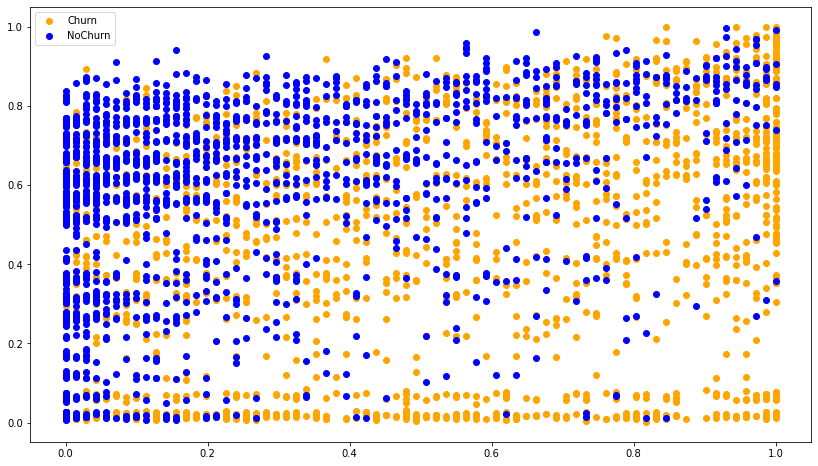

In [19]:
print(df_under.Churn.value_counts())
plt.figure(figsize=(14,8))
g1 = plt.scatter(df_under[df_under['Churn']==0].tenure,df_under[df_under['Churn']==0].MonthlyCharges,color = 'orange')
g2 = plt.scatter(df_under[df_under['Churn']==1].tenure,df_under[df_under['Churn']==1].MonthlyCharges,color = 'blue')
plt.legend((g1,g2),
           ('Churn', 'NoChurn'))
plt.show()

Oversampling

1    5163
0    5163
Name: Churn, dtype: int64


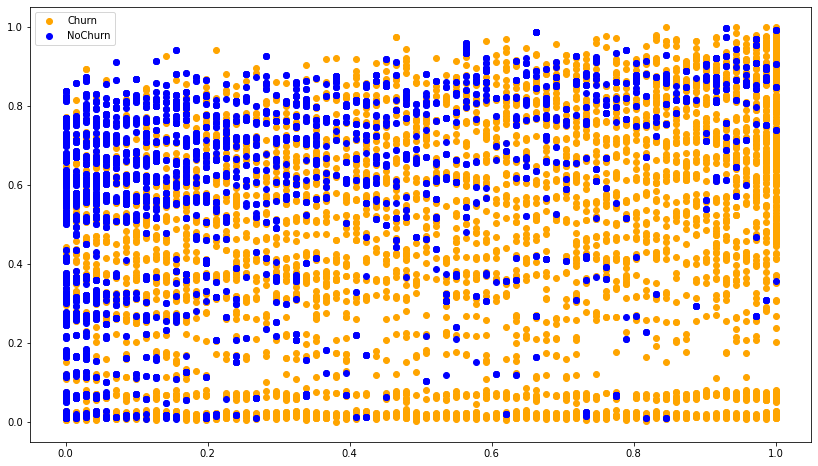

In [20]:
df_class_2_over = df_class_2.sample(count_class1,replace=True)
df_over = pd.concat([df_class_1,df_class_2_over],axis=0)
print(df_over.Churn.value_counts())
plt.figure(figsize=(14,8))
g1 = plt.scatter(df_over[df_over['Churn']==0].tenure,df_over[df_over['Churn']==0].MonthlyCharges,color = 'orange')
g2 = plt.scatter(df_over[df_over['Churn']==1].tenure,df_over[df_over['Churn']==1].MonthlyCharges,color = 'blue')
plt.legend((g1,g2),
           ('Churn', 'NoChurn'))
plt.show()

SMOTE

In [21]:
X = new_df.drop('Churn',axis=1)
y = new_df['Churn']

In [22]:
from imblearn.over_sampling import SMOTE
# upsampling
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [24]:
from imblearn.under_sampling import NearMiss 
# downsampling
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y)

y_nm.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64